In [1]:
import sys
sys.path.append('/mnt/d/ariel2/code/core/')
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
importlib.reload(kgs);

local
local


In [2]:
%%time
train_data = kgs.load_all_train_data()
test_data = kgs.load_all_test_data()
len(train_data), len(test_data)

CPU times: user 445 ms, sys: 108 ms, total: 553 ms
Wall time: 1.67 s


(1100, 1)

inf
enable
enable
inf
enable
enable
(67500, 32, 32) (5625, 32, 282) [[[-20.12690728 -20.38798005]
  [  7.03940191  -2.27070424]]

 [[  6.70829617   2.26477281]
  [ -4.69433781  29.51198069]]] [[[ 8.97373634  8.85112505]
  [25.34483614 27.27963293]]

 [[29.51825236 17.74202494]
  [ 4.59100055 18.17648992]]]
CPU times: user 16.8 s, sys: 4.17 s, total: 21 s
Wall time: 21.1 s


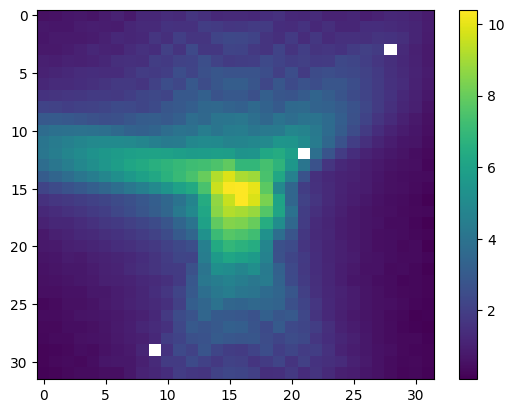

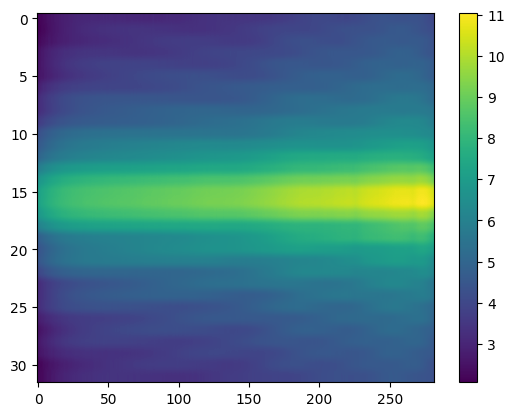

In [3]:
%%time
import ariel_load
import copy
kgs.profiling=False
importlib.reload(ariel_load)
loaders = ariel_load.default_loaders()
d = copy.deepcopy(train_data[0])
d.transits[0].load_to_step(3, d, loaders)
print(d.transits[0].data[0].data.shape, d.transits[0].data[1].data.shape, d.transits[0].data[0].data[:2,:2,:2], d.transits[0].data[1].data[:2,:2,:2])
plt.figure()
plt.imshow(np.log(np.mean(d.transits[0].data[0].data.get(), axis=0)),aspect='auto')
plt.colorbar()
plt.figure()
plt.imshow(np.log(np.mean(d.transits[0].data[1].data.get(), axis=0)),aspect='auto')
plt.colorbar()
#d.transits[0].load_to_step(0,d,loaders)
#d.transits[0].data[0]
ref = kgs.dill_load(kgs.temp_dir + '/ref.pickle')
assert cp.array_equal(ref[0].data, d.transits[0].data[0].data, equal_nan=True)
assert cp.array_equal(ref[1].data, d.transits[0].data[1].data, equal_nan=True)

In [20]:
#kgs.dill_save(kgs.temp_dir + '/ref.pickle', d.transits[0].data)